In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# Unsupervised Learning

In [2]:
df = pd.read_csv("../data/processed/processed_data-valencia_barcelona.csv")
df

,ID,Título,Enlace,Descripción,city,price,rooms,meters,Elevator,Floor
0,106061040,"Ático en calle de València, La Dreta de l'Eixa...",https://www.idealista.com/inmueble/106061040/,"Ático de 79 m² construidos, situado en un edif...",valencia,650000,3,79.0,True,6.0
1,105435068,"Piso en calle del Rosselló, La Dreta de l'Eixa...",https://www.idealista.com/inmueble/105435068/,Este impecable piso se sitúa entre Paseo de Gr...,valencia,1800000,2,175.0,True,1.0
2,102772221,"Piso en calle de Provença, La Dreta de l'Eixam...",https://www.idealista.com/inmueble/102772221/,Espectacular y amplio Principal con terraza en...,valencia,2100000,3,243.0,True,1.0
3,105075436,"Piso en plaza Tetuan, La Dreta de l'Eixample, ...",https://www.idealista.com/inmueble/105075436/,Elegante piso con amplia terraza en finca regi...,valencia,2550000,5,283.0,True,1.0
4,103305568,Casa o chalet independiente en calle de Benede...,https://www.idealista.com/inmueble/103305568/,Esta fabulosa moderna y funcional casa unifami...,valencia,2000000,4,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...
443,100686482,"Dúplex en calle D'Abdó Terradas, Vila de Gràci...",https://www.idealista.com/inmueble/100686482/,Este inmueble único en la zona hará que vivas ...,barcelona,655000,3,147.0,False,NaN
444,102256338,"Piso en rambla de Catalunya, La Dreta de l'Eix...",https://www.idealista.com/inmueble/102256338/,Este espectacular piso reformado a estrenar co...,barcelona,1595000,4,191.0,True,2.0
445,103780867,"Piso en calle de Casp, La Dreta de l'Eixample,...",https://www.idealista.com/inmueble/103780867/,Impresionante propiedad de lujo está situada e...,barcelona,1660000,3,298.0,True,1.0
446,101913750,"Chalet adosado en Passatge de Maria Llimona, D...",https://www.idealista.com/inmueble/101913750/,PASSATGE MARIA LLIMONA. Imponente casa adosada...,barcelona,1245000,3,NaN,False,NaN


In [3]:
columns_keep = ["ID", "Descripción", "city", "price", "rooms", "meters", "Elevator", "Floor"]

In [4]:
df = df[columns_keep]
df

,ID,Descripción,city,price,rooms,meters,Elevator,Floor
0,106061040,"Ático de 79 m² construidos, situado en un edif...",valencia,650000,3,79.0,True,6.0
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,valencia,1800000,2,175.0,True,1.0
2,102772221,Espectacular y amplio Principal con terraza en...,valencia,2100000,3,243.0,True,1.0
3,105075436,Elegante piso con amplia terraza en finca regi...,valencia,2550000,5,283.0,True,1.0
4,103305568,Esta fabulosa moderna y funcional casa unifami...,valencia,2000000,4,NaN,False,NaN
...,...,...,...,...,...,...,...,...
443,100686482,Este inmueble único en la zona hará que vivas ...,barcelona,655000,3,147.0,False,NaN
444,102256338,Este espectacular piso reformado a estrenar co...,barcelona,1595000,4,191.0,True,2.0
445,103780867,Impresionante propiedad de lujo está situada e...,barcelona,1660000,3,298.0,True,1.0
446,101913750,PASSATGE MARIA LLIMONA. Imponente casa adosada...,barcelona,1245000,3,NaN,False,NaN


## data cleaning for training

In [5]:
df = pd.get_dummies(df, columns=['city'])
df

,ID,Descripción,price,rooms,meters,Elevator,Floor,city_barcelona,city_valencia
0,106061040,"Ático de 79 m² construidos, situado en un edif...",650000,3,79.0,True,6.0,False,True
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,1800000,2,175.0,True,1.0,False,True
2,102772221,Espectacular y amplio Principal con terraza en...,2100000,3,243.0,True,1.0,False,True
3,105075436,Elegante piso con amplia terraza en finca regi...,2550000,5,283.0,True,1.0,False,True
4,103305568,Esta fabulosa moderna y funcional casa unifami...,2000000,4,NaN,False,NaN,False,True
...,...,...,...,...,...,...,...,...,...
443,100686482,Este inmueble único en la zona hará que vivas ...,655000,3,147.0,False,NaN,True,False
444,102256338,Este espectacular piso reformado a estrenar co...,1595000,4,191.0,True,2.0,True,False
445,103780867,Impresionante propiedad de lujo está situada e...,1660000,3,298.0,True,1.0,True,False
446,101913750,PASSATGE MARIA LLIMONA. Imponente casa adosada...,1245000,3,NaN,False,NaN,True,False


In [6]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)


In [7]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,ID,Descripción,price,rooms,meters,Elevator,Floor,city_barcelona,city_valencia
0,106061040,"Ático de 79 m² construidos, situado en un edif...",650000,3,79.0,1,6.0,0,1
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,1800000,2,175.0,1,1.0,0,1
2,102772221,Espectacular y amplio Principal con terraza en...,2100000,3,243.0,1,1.0,0,1
3,105075436,Elegante piso con amplia terraza en finca regi...,2550000,5,283.0,1,1.0,0,1
4,106627368,Encantador piso de 155 m² construidos completa...,789000,3,155.0,1,3.0,0,1
...,...,...,...,...,...,...,...,...,...
369,106318790,Excens Real Estate presenta este impresionante...,1800000,4,253.0,1,2.0,1,0
370,98261311,"Exclusiva vivienda de 125m2 construidos, distr...",1810000,2,168.0,1,4.0,1,0
371,102256338,Este espectacular piso reformado a estrenar co...,1595000,4,191.0,1,2.0,1,0
372,103780867,Impresionante propiedad de lujo está situada e...,1660000,3,298.0,1,1.0,1,0


## Using transformer for description field

In [8]:
from sentence_transformers import SentenceTransformer

In [9]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


In [10]:
sentence = df["Descripción"][0]
sentence

"Ático de 79 m² construidos, situado en un edificio modernista catalogado de 1936, en el prestigioso Quadrat d'Or de Barcelona. La vivienda cuenta con 3 habitaciones, incluyendo una suite principal, una habitación mediana con baño en suite y una habitación individual, distribuidas de manera funcional para maximizar la comodidad y el confort.\nEl espacio se divide en una zona de día que incluye un salón con techo de volta catalana, suelos originales y amplios ventanales orientados al sur, ofreciendo abundante luz natural y vistas despejadas. La c"

In [11]:
embeddings = model.encode(sentence)
print(embeddings)

[ 4.16049436e-02  9.00701433e-02 -1.45567618e-02 -1.47747556e-02
 -8.19714293e-02  2.24395376e-03  7.23484671e-03  1.72766075e-02
 -2.13153437e-02  3.15630287e-02  3.24122570e-02 -5.85337318e-02
  6.03663549e-02 -1.75516512e-02  9.93569731e-04 -1.77338421e-02
 -2.53736451e-02  3.32454965e-02  1.47633357e-02  6.69481084e-02
  8.42736810e-02 -2.32194085e-02 -3.73853445e-02  5.64047210e-02
 -6.12007380e-02  3.39466333e-02 -8.84285420e-02  1.93868969e-02
 -1.05756866e-02 -6.69689476e-02 -2.58619594e-03  9.66589078e-02
  8.14458877e-02 -3.95646505e-02  6.09650137e-03 -5.99916242e-02
 -3.37307481e-03 -3.52141373e-02 -4.50836793e-02  1.36458933e-01
 -1.34718597e-01 -4.62130038e-03 -8.75850022e-03 -3.29593197e-02
 -4.97699529e-02  8.86611734e-03  2.67830547e-02 -3.73028331e-02
  5.69123600e-04 -1.02341376e-01  1.22280307e-02 -2.79186666e-02
 -3.63887176e-02 -4.57092859e-02 -2.47430820e-02 -3.52278389e-02
 -1.68445613e-02 -1.13472734e-02  9.41159278e-02  7.04364404e-02
  1.43444732e-01  4.71522

In [12]:
embeddings.shape

(384,)

In [13]:
embeddings = model.encode(df["Descripción"], batch_size=256, show_progress_bar=True)
print(embeddings)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

[[ 0.04160494  0.09007017 -0.01455672 ...  0.09005897 -0.02895888
  -0.03982422]
 [ 0.02988338  0.08088097  0.01550083 ...  0.060855    0.0151156
   0.02633475]
 [ 0.06594904  0.05061241  0.01425559 ...  0.06560764 -0.00225113
  -0.05867773]
 ...
 [ 0.01283704 -0.07288507  0.02074856 ...  0.08769634  0.06438337
  -0.06934912]
 [-0.02126107  0.04714815  0.01790782 ...  0.02438501 -0.0593134
  -0.01781595]
 [ 0.0594071   0.07140784  0.03443874 ...  0.13513078  0.01833617
  -0.0281551 ]]


In [14]:
embeddings.shape

(374, 384)

In [15]:
number_of_embeddings = 7
pca = PCA(n_components=number_of_embeddings)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embedding_df = pd.DataFrame(reduced_embeddings)
reduced_embedding_df.columns = [f"embedding_{i}" for i in range(reduced_embedding_df.shape[1])]
reduced_embedding_df


,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6
0,-0.174039,-0.016262,0.038446,-0.011247,-0.015978,-0.247689,0.127020
1,0.005627,0.061370,-0.220798,-0.134452,0.079445,-0.133114,0.099031
2,-0.008552,-0.144828,-0.284851,-0.060742,0.192425,-0.095087,-0.000966
3,-0.093232,-0.095556,-0.182072,-0.140997,-0.181775,0.054209,0.193533
4,-0.178295,0.161844,0.066515,0.034070,0.081212,-0.234113,0.044261
...,...,...,...,...,...,...,...
369,-0.064767,0.070460,0.088316,-0.134378,0.125714,-0.068850,-0.003484
370,-0.166078,-0.206100,0.245233,0.014997,-0.177573,-0.220418,-0.290484
371,-0.016264,0.163027,-0.147395,-0.337106,-0.185053,-0.041601,-0.004039
372,0.093062,-0.246183,-0.270330,-0.085506,0.095051,-0.065899,-0.073688


In [16]:
df = pd.concat([df, reduced_embedding_df], axis=1)
df


,ID,Descripción,price,rooms,meters,Elevator,Floor,city_barcelona,city_valencia,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6
0,106061040,"Ático de 79 m² construidos, situado en un edif...",650000,3,79.0,1,6.0,0,1,-0.174039,-0.016262,0.038446,-0.011247,-0.015978,-0.247689,0.127020
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,1800000,2,175.0,1,1.0,0,1,0.005627,0.061370,-0.220798,-0.134452,0.079445,-0.133114,0.099031
2,102772221,Espectacular y amplio Principal con terraza en...,2100000,3,243.0,1,1.0,0,1,-0.008552,-0.144828,-0.284851,-0.060742,0.192425,-0.095087,-0.000966
3,105075436,Elegante piso con amplia terraza en finca regi...,2550000,5,283.0,1,1.0,0,1,-0.093232,-0.095556,-0.182072,-0.140997,-0.181775,0.054209,0.193533
4,106627368,Encantador piso de 155 m² construidos completa...,789000,3,155.0,1,3.0,0,1,-0.178295,0.161844,0.066515,0.034070,0.081212,-0.234113,0.044261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,106318790,Excens Real Estate presenta este impresionante...,1800000,4,253.0,1,2.0,1,0,-0.064767,0.070460,0.088316,-0.134378,0.125714,-0.068850,-0.003484
370,98261311,"Exclusiva vivienda de 125m2 construidos, distr...",1810000,2,168.0,1,4.0,1,0,-0.166078,-0.206100,0.245233,0.014997,-0.177573,-0.220418,-0.290484
371,102256338,Este espectacular piso reformado a estrenar co...,1595000,4,191.0,1,2.0,1,0,-0.016264,0.163027,-0.147395,-0.337106,-0.185053,-0.041601,-0.004039
372,103780867,Impresionante propiedad de lujo está situada e...,1660000,3,298.0,1,1.0,1,0,0.093062,-0.246183,-0.270330,-0.085506,0.095051,-0.065899,-0.073688


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              374 non-null    int64  
 1   Descripción     374 non-null    object 
 2   price           374 non-null    int64  
 3   rooms           374 non-null    int64  
 4   meters          374 non-null    float64
 5   Elevator        374 non-null    int64  
 6   Floor           374 non-null    float64
 7   city_barcelona  374 non-null    int64  
 8   city_valencia   374 non-null    int64  
 9   embedding_0     374 non-null    float32
 10  embedding_1     374 non-null    float32
 11  embedding_2     374 non-null    float32
 12  embedding_3     374 non-null    float32
 13  embedding_4     374 non-null    float32
 14  embedding_5     374 non-null    float32
 15  embedding_6     374 non-null    float32
dtypes: float32(7), float64(2), int64(6), object(1)
memory usage: 36.7+ KB


## Scaling

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["ID", "Descripción"]))
df_scaled.shape


(374, 14)

In [19]:
df_scaled

array([[-0.66961999, -0.38356325, -1.07812061, ..., -0.12965699,
        -2.09288459,  1.13252046],
       [ 0.86449668, -1.17611937, -0.02404435, ...,  0.64468445,
        -1.12477048,  0.88297162],
       [ 1.26470103, -0.38356325,  0.722593  , ...,  1.56149743,
        -0.8034515 , -0.0086142 ],
       ...,
       [ 0.59102371,  0.40899286,  0.15163502, ..., -1.50167411,
        -0.35151392, -0.03601385],
       [ 0.67773465, -0.38356325,  1.32649085, ...,  0.77132507,
        -0.55682343, -0.65700625],
       [ 2.33191262,  0.40899286,  2.11704804, ...,  1.81907399,
        -0.48245683,  1.21058829]])

## Kmeans

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_kmeans'] = kmeans.fit_predict(df_scaled)


## DBSCAN

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_dbscan'] = dbscan.fit_predict(df_scaled)

In [22]:
df

,ID,Descripción,price,rooms,meters,Elevator,Floor,city_barcelona,city_valencia,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,Cluster_kmeans,Cluster_dbscan
0,106061040,"Ático de 79 m² construidos, situado en un edif...",650000,3,79.0,1,6.0,0,1,-0.174039,-0.016262,0.038446,-0.011247,-0.015978,-0.247689,0.127020,2,-1
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,1800000,2,175.0,1,1.0,0,1,0.005627,0.061370,-0.220798,-0.134452,0.079445,-0.133114,0.099031,2,-1
2,102772221,Espectacular y amplio Principal con terraza en...,2100000,3,243.0,1,1.0,0,1,-0.008552,-0.144828,-0.284851,-0.060742,0.192425,-0.095087,-0.000966,2,-1
3,105075436,Elegante piso con amplia terraza en finca regi...,2550000,5,283.0,1,1.0,0,1,-0.093232,-0.095556,-0.182072,-0.140997,-0.181775,0.054209,0.193533,2,-1
4,106627368,Encantador piso de 155 m² construidos completa...,789000,3,155.0,1,3.0,0,1,-0.178295,0.161844,0.066515,0.034070,0.081212,-0.234113,0.044261,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,106318790,Excens Real Estate presenta este impresionante...,1800000,4,253.0,1,2.0,1,0,-0.064767,0.070460,0.088316,-0.134378,0.125714,-0.068850,-0.003484,1,-1
370,98261311,"Exclusiva vivienda de 125m2 construidos, distr...",1810000,2,168.0,1,4.0,1,0,-0.166078,-0.206100,0.245233,0.014997,-0.177573,-0.220418,-0.290484,1,-1
371,102256338,Este espectacular piso reformado a estrenar co...,1595000,4,191.0,1,2.0,1,0,-0.016264,0.163027,-0.147395,-0.337106,-0.185053,-0.041601,-0.004039,1,-1
372,103780867,Impresionante propiedad de lujo está situada e...,1660000,3,298.0,1,1.0,1,0,0.093062,-0.246183,-0.270330,-0.085506,0.095051,-0.065899,-0.073688,1,-1


## Representation
Para representar el resultado, vamos a reducir el `df_scaled` a 2 dimensiones con un PCA

In [23]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df_scaled)
reduced_df.shape

(374, 2)

In [24]:
df[["pca1", "pca2"]] = reduced_df
df

,ID,Descripción,price,rooms,meters,Elevator,Floor,city_barcelona,city_valencia,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,Cluster_kmeans,Cluster_dbscan,pca1,pca2
0,106061040,"Ático de 79 m² construidos, situado en un edif...",650000,3,79.0,1,6.0,0,1,-0.174039,-0.016262,0.038446,-0.011247,-0.015978,-0.247689,0.127020,2,-1,-0.622249,2.086414
1,105435068,Este impecable piso se sitúa entre Paseo de Gr...,1800000,2,175.0,1,1.0,0,1,0.005627,0.061370,-0.220798,-0.134452,0.079445,-0.133114,0.099031,2,-1,0.407183,1.588758
2,102772221,Espectacular y amplio Principal con terraza en...,2100000,3,243.0,1,1.0,0,1,-0.008552,-0.144828,-0.284851,-0.060742,0.192425,-0.095087,-0.000966,2,-1,1.906997,1.081985
3,105075436,Elegante piso con amplia terraza en finca regi...,2550000,5,283.0,1,1.0,0,1,-0.093232,-0.095556,-0.182072,-0.140997,-0.181775,0.054209,0.193533,2,-1,2.213389,0.375014
4,106627368,Encantador piso de 155 m² construidos completa...,789000,3,155.0,1,3.0,0,1,-0.178295,0.161844,0.066515,0.034070,0.081212,-0.234113,0.044261,2,-1,-0.252314,1.665346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,106318790,Excens Real Estate presenta este impresionante...,1800000,4,253.0,1,2.0,1,0,-0.064767,0.070460,0.088316,-0.134378,0.125714,-0.068850,-0.003484,1,-1,0.546583,-1.552116
370,98261311,"Exclusiva vivienda de 125m2 construidos, distr...",1810000,2,168.0,1,4.0,1,0,-0.166078,-0.206100,0.245233,0.014997,-0.177573,-0.220418,-0.290484,1,-1,-0.333026,-0.956154
371,102256338,Este espectacular piso reformado a estrenar co...,1595000,4,191.0,1,2.0,1,0,-0.016264,0.163027,-0.147395,-0.337106,-0.185053,-0.041601,-0.004039,1,-1,-0.120574,-1.294522
372,103780867,Impresionante propiedad de lujo está situada e...,1660000,3,298.0,1,1.0,1,0,0.093062,-0.246183,-0.270330,-0.085506,0.095051,-0.065899,-0.073688,1,-1,1.230866,-1.138606


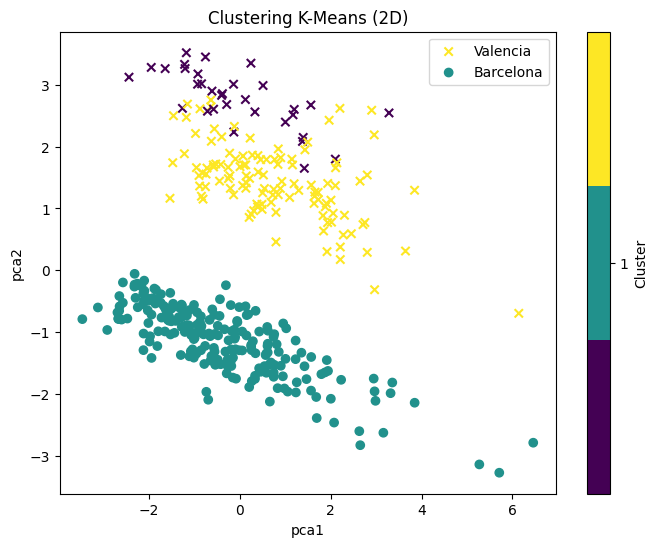

In [25]:
unique_clusters_kmeans = np.unique(df['Cluster_kmeans'])
cmap = plt.get_cmap('viridis', len(unique_clusters_kmeans))  


plt.figure(figsize=(8, 6))
plt.scatter(df[df["city_valencia"] == 1]['pca1'], df[df["city_valencia"] == 1]['pca2'], c=df[df["city_valencia"] == 1]['Cluster_kmeans'], cmap=cmap, marker='x', label="Valencia")
plt.scatter(df[df["city_barcelona"] == 1]['pca1'], df[df["city_barcelona"] == 1]['pca2'], c=df[df["city_barcelona"] == 1]['Cluster_kmeans'], cmap=cmap, marker='o', label="Barcelona")
plt.title('Clustering K-Means (2D)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(label='Cluster', ticks=np.arange(len(unique_clusters_kmeans)))
plt.legend()
plt.show()


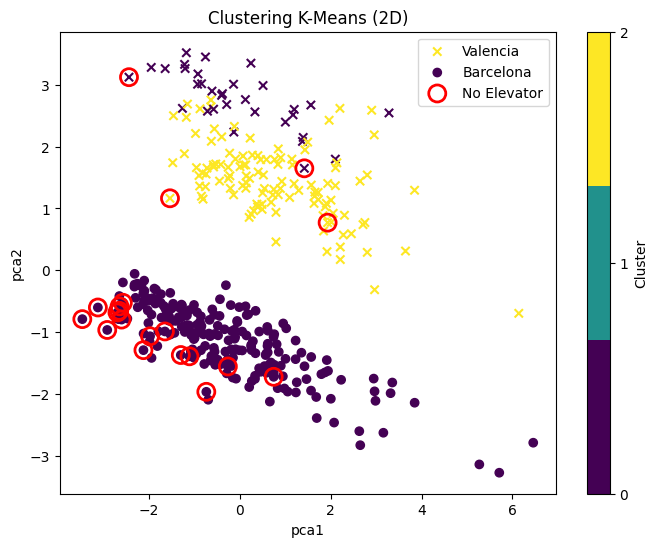

In [ ]:
unique_clusters_kmeans = np.unique(df['Cluster_kmeans'])
cmap = plt.get_cmap('viridis', len(unique_clusters_kmeans))  
elevator_points = df[df['Elevator'] == 0]  
plt.figure(figsize=(8, 6))
sc = plt.scatter(df[df["city_valencia"] == 1]['pca1'], df[df["city_valencia"] == 1]['pca2'], 
                 c=df[df["city_valencia"] == 1]['Cluster_kmeans'], cmap=cmap, marker='x', label="Valencia")
plt.scatter(df[df["city_barcelona"] == 1]['pca1'], df[df["city_barcelona"] == 1]['pca2'], 
            c=df[df["city_barcelona"] == 1]['Cluster_kmeans'], cmap=cmap, marker='o', label="Barcelona")
plt.scatter(elevator_points['pca1'], elevator_points['pca2'], 
            edgecolors='red', facecolors='none', s=150, linewidths=2, label="No Elevator")

plt.title('Clustering K-Means (2D)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(sc, label='Cluster', ticks=np.arange(len(unique_clusters_kmeans)))
plt.legend()
plt.show()


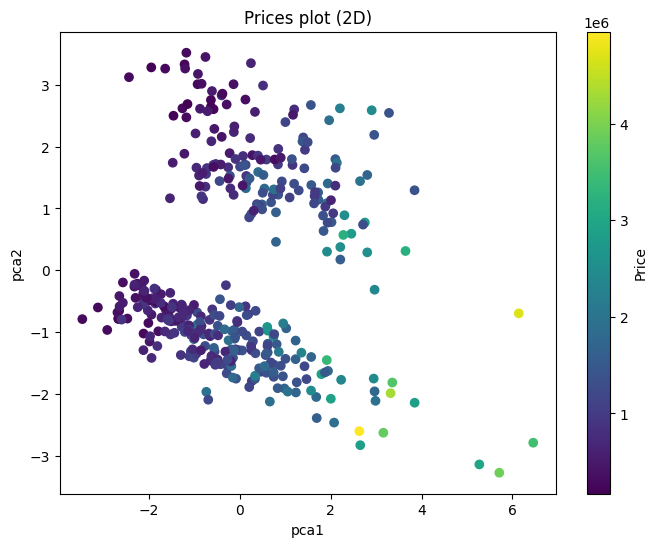

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pca1'], df['pca2'], c=df['price'],  marker='o')
plt.title('Prices plot (2D)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(label='Price')
plt.show()


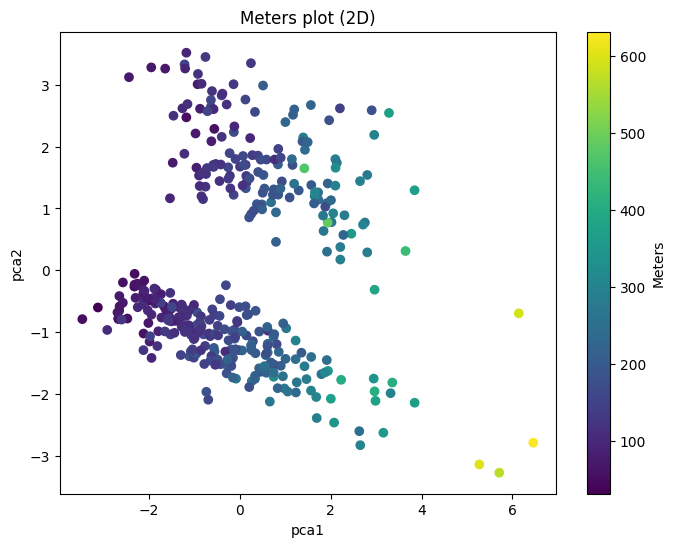

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pca1'], df['pca2'], c=df['meters'],  marker='o')
plt.title('Meters plot (2D)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(label='Meters')
plt.show()


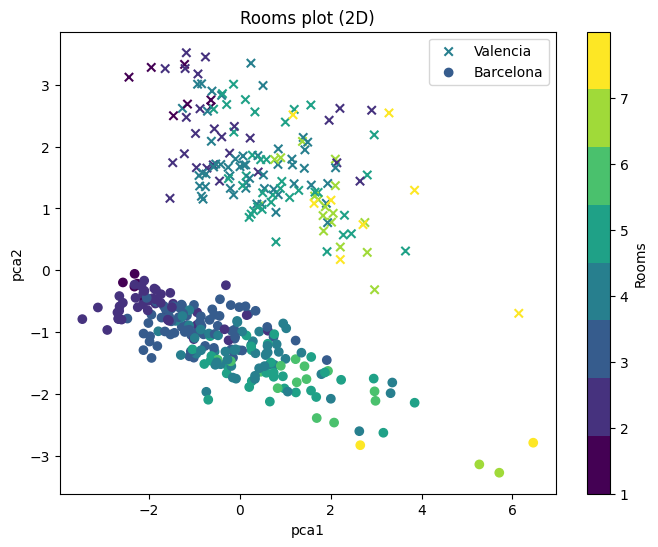

In [41]:
unique_rooms = np.unique(df['rooms'])
cmap = plt.get_cmap('viridis', len(unique_rooms))  


plt.figure(figsize=(8, 6))
plt.scatter(df[df["city_valencia"] == 1]['pca1'], df[df["city_valencia"] == 1]['pca2'], c=df[df["city_valencia"] == 1]['rooms'], cmap=cmap, marker='x', label="Valencia")
plt.scatter(df[df["city_barcelona"] == 1]['pca1'], df[df["city_barcelona"] == 1]['pca2'], c=df[df["city_barcelona"] == 1]['rooms'], cmap=cmap, marker='o', label="Barcelona")
plt.title('Rooms plot (2D)')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(label='Rooms', ticks=np.arange(len(unique_rooms)))
plt.legend()
plt.show()